In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## About Colabs

Machine Learning Crash Course uses Colaboratories (**Colabs**) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). Like all Jupyter Notebooks, a Colab consists of two kinds of components:

  * **Text cells**, which contain explanations. You are currently reading a text cell.
  * **Code cells**, which contain Python code for you to run. Code cells have a light gray background.

You *read* the text cells and *run* the code cells.

### Running code cells

You must run code cells in order. In other words, you may only run a code cell once all the code cells preceding it have already been run. 

To run a code cell:

  1. Place the cursor anywhere inside the [ ] area at the top left of a code cell. The area inside the [ ] will display an arrow.
  2. Click the arrow.

Alternatively, you may invoke **Runtime->Run all**. Note, though, that some of the code cells will fail because not all the coding is complete. (You'll complete the coding as part of the exercise.)

### Understanding hidden code cells

We've **hidden** the code in code cells that don't advance the learning objectives. For example, we've hidden the code that plots graphs. However, **you must still run code cells containing hidden code**. You'll know that the code is hidden because you'll see a title (for example, "Load the functions that build and train a model") without seeing the code.

To view the hidden code, just double click the header.

### Why did you see an error?

If a code cell returns an error when you run it, consider two common problems:

  * You didn't run *all* of the code cells preceding the current code cell.
  * If the code cell is labeled as a **Task**, then you haven't written the necessary code. 

## Use the right version of TensorFlow

The following hidden code cell ensures that the Colab will run on TensorFlow 2.X, which is the most recent version of TensorFlow:

In [2]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


## Import relevant modules

The following cell imports the packages that the program requires:

In [3]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [5]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [6]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [7]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 1s 44ms/sample - loss: 1202.9153 - root_mean_squared_error: 34.6831
Epoch 2/10
12/12 [==============================] - 0s 968us/sample - loss: 1184.8862 - root_mean_squared_error: 34.4222
Epoch 3/10
12/12 [==============================] - 0s 866us/sample - loss: 1171.9385 - root_mean_squared_error: 34.2336
Epoch 4/10
12/12 [==============================] - 0s 1ms/sample - loss: 1161.1749 - root_mean_squared_error: 34.0760
Epoch 5/10
12/12 [==============================] - 0s 1ms/sample - loss: 1151.6774 - root_mean_squared_error: 33.9364
Epoch 6/10
12/12 [==============================] - 0s 1ms/sample - loss: 1143.0194 - root_mean_squared_error: 33.8086
Epoch 7/10
12/12 [==============================] - 0s 1ms/sample - loss: 1134.9642 - root_mean_squared_error: 33.6892
Epoch 8/10
12/12 [==============================] - 0s 1ms/sample - loss: 1127.3643 - root_mean_squared_error: 33.5762
Epoch 9/10
12/12 [=====

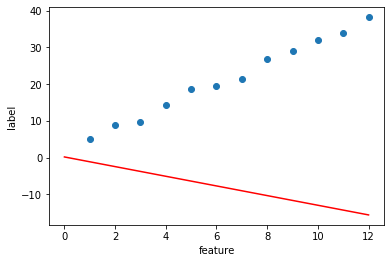

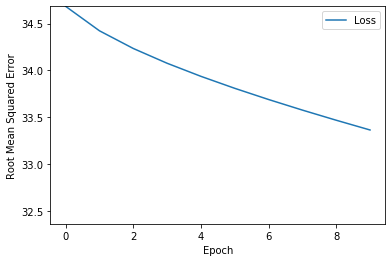

In [8]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

In [9]:
learning_rate=0.01
epochs= ?   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

SyntaxError: invalid syntax (<ipython-input-9-eba175bc66c9>, line 2)

Train on 12 samples
Epoch 1/450
12/12 [==============================] - 0s 22ms/sample - loss: 437.2354 - root_mean_squared_error: 20.9102
Epoch 2/450
12/12 [==============================] - 0s 825us/sample - loss: 426.3960 - root_mean_squared_error: 20.6494
Epoch 3/450
12/12 [==============================] - 0s 1ms/sample - loss: 418.6640 - root_mean_squared_error: 20.4613
Epoch 4/450
12/12 [==============================] - 0s 893us/sample - loss: 412.2675 - root_mean_squared_error: 20.3044
Epoch 5/450
12/12 [==============================] - 0s 978us/sample - loss: 406.6459 - root_mean_squared_error: 20.1655
Epoch 6/450
12/12 [==============================] - 0s 994us/sample - loss: 401.5398 - root_mean_squared_error: 20.0385
Epoch 7/450
12/12 [==============================] - 0s 1ms/sample - loss: 396.8046 - root_mean_squared_error: 19.9200
Epoch 8/450
12/12 [==============================] - 0s 1ms/sample - loss: 392.3507 - root_mean_squared_error: 19.8078
Epoch 9/450
12/12 [

12/12 [==============================] - 0s 1ms/sample - loss: 217.6989 - root_mean_squared_error: 14.7546
Epoch 70/450
12/12 [==============================] - 0s 1ms/sample - loss: 215.3873 - root_mean_squared_error: 14.6761
Epoch 71/450
12/12 [==============================] - 0s 1ms/sample - loss: 213.0886 - root_mean_squared_error: 14.5976
Epoch 72/450
12/12 [==============================] - 0s 974us/sample - loss: 210.8029 - root_mean_squared_error: 14.5191
Epoch 73/450
12/12 [==============================] - 0s 1ms/sample - loss: 208.5304 - root_mean_squared_error: 14.4406
Epoch 74/450
12/12 [==============================] - 0s 954us/sample - loss: 206.2709 - root_mean_squared_error: 14.3621
Epoch 75/450
12/12 [==============================] - 0s 1ms/sample - loss: 204.0244 - root_mean_squared_error: 14.2837
Epoch 76/450
12/12 [==============================] - 0s 1ms/sample - loss: 201.7908 - root_mean_squared_error: 14.2053
Epoch 77/450
12/12 [=============================

Epoch 137/450
12/12 [==============================] - 0s 894us/sample - loss: 89.8449 - root_mean_squared_error: 9.4787
Epoch 138/450
12/12 [==============================] - 0s 1ms/sample - loss: 88.4040 - root_mean_squared_error: 9.4023
Epoch 139/450
12/12 [==============================] - 0s 1ms/sample - loss: 86.9756 - root_mean_squared_error: 9.3261
Epoch 140/450
12/12 [==============================] - 0s 1ms/sample - loss: 85.5599 - root_mean_squared_error: 9.2499
Epoch 141/450
12/12 [==============================] - 0s 1ms/sample - loss: 84.1567 - root_mean_squared_error: 9.1737
Epoch 142/450
12/12 [==============================] - 0s 968us/sample - loss: 82.7660 - root_mean_squared_error: 9.0976
Epoch 143/450
12/12 [==============================] - 0s 1ms/sample - loss: 81.3879 - root_mean_squared_error: 9.0215
Epoch 144/450
12/12 [==============================] - 0s 870us/sample - loss: 80.0223 - root_mean_squared_error: 8.9455
Epoch 145/450
12/12 [=====================

Epoch 206/450
12/12 [==============================] - 0s 1ms/sample - loss: 19.3115 - root_mean_squared_error: 4.3945
Epoch 207/450
12/12 [==============================] - 0s 1ms/sample - loss: 18.7073 - root_mean_squared_error: 4.3252
Epoch 208/450
12/12 [==============================] - 0s 1ms/sample - loss: 18.1146 - root_mean_squared_error: 4.2561
Epoch 209/450
12/12 [==============================] - 0s 1ms/sample - loss: 17.5331 - root_mean_squared_error: 4.1873
Epoch 210/450
12/12 [==============================] - 0s 1ms/sample - loss: 16.9630 - root_mean_squared_error: 4.1186
Epoch 211/450
12/12 [==============================] - 0s 1ms/sample - loss: 16.4042 - root_mean_squared_error: 4.0502
Epoch 212/450
12/12 [==============================] - 0s 948us/sample - loss: 15.8566 - root_mean_squared_error: 3.9820
Epoch 213/450
12/12 [==============================] - 0s 1ms/sample - loss: 15.3203 - root_mean_squared_error: 3.9141
Epoch 214/450
12/12 [=========================

Epoch 275/450
12/12 [==============================] - 0s 896us/sample - loss: 0.9752 - root_mean_squared_error: 0.9875
Epoch 276/450
12/12 [==============================] - 0s 899us/sample - loss: 0.9604 - root_mean_squared_error: 0.9800
Epoch 277/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.9480 - root_mean_squared_error: 0.9737
Epoch 278/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.9377 - root_mean_squared_error: 0.9683
Epoch 279/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.9291 - root_mean_squared_error: 0.9639
Epoch 280/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.9221 - root_mean_squared_error: 0.9603
Epoch 281/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.9165 - root_mean_squared_error: 0.9573
Epoch 282/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.9120 - root_mean_squared_error: 0.9550
Epoch 283/450
12/12 [==============================]

Epoch 344/450
12/12 [==============================] - 0s 969us/sample - loss: 0.8765 - root_mean_squared_error: 0.9362
Epoch 345/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8763 - root_mean_squared_error: 0.9361
Epoch 346/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8762 - root_mean_squared_error: 0.9360
Epoch 347/450
12/12 [==============================] - 0s 958us/sample - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 348/450
12/12 [==============================] - 0s 944us/sample - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 349/450
12/12 [==============================] - 0s 910us/sample - loss: 0.8783 - root_mean_squared_error: 0.9372
Epoch 350/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8894 - root_mean_squared_error: 0.9431
Epoch 351/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8864 - root_mean_squared_error: 0.9415
Epoch 352/450
12/12 [===========================

12/12 [==============================] - 0s 988us/sample - loss: 0.8767 - root_mean_squared_error: 0.9363
Epoch 414/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8767 - root_mean_squared_error: 0.9363
Epoch 415/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8766 - root_mean_squared_error: 0.9363
Epoch 416/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8766 - root_mean_squared_error: 0.9363
Epoch 417/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8767 - root_mean_squared_error: 0.9363
Epoch 418/450
12/12 [==============================] - 0s 1ms/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 419/450
12/12 [==============================] - 0s 983us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 420/450
12/12 [==============================] - 0s 960us/sample - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 421/450
12/12 [==============================] - 0s 1ms/sa

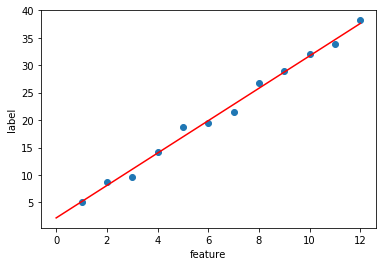

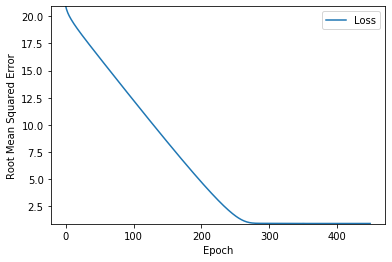

In [10]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Train on 12 samples
Epoch 1/500
12/12 [==============================] - 0s 27ms/sample - loss: 615.9805 - root_mean_squared_error: 24.8190
Epoch 2/500
12/12 [==============================] - 0s 804us/sample - loss: 6687790.0000 - root_mean_squared_error: 2586.0762
Epoch 3/500
12/12 [==============================] - 0s 1ms/sample - loss: 610.6464 - root_mean_squared_error: 24.7113
Epoch 4/500
12/12 [==============================] - 0s 1ms/sample - loss: 3.5214 - root_mean_squared_error: 1.8765
Epoch 5/500
12/12 [==============================] - 0s 1ms/sample - loss: 1.0452 - root_mean_squared_error: 1.0224
Epoch 6/500
12/12 [==============================] - 0s 1ms/sample - loss: 1.0013 - root_mean_squared_error: 1.0006
Epoch 7/500
12/12 [==============================] - 0s 1ms/sample - loss: 0.9921 - root_mean_squared_error: 0.9960
Epoch 8/500
12/12 [==============================] - 0s 1ms/sample - loss: 0.9841 - root_mean_squared_error: 0.9920
Epoch 9/500
12/12 [===============

Epoch 69/500
12/12 [==============================] - 0s 885us/sample - loss: 302641.9375 - root_mean_squared_error: 550.1290
Epoch 70/500
12/12 [==============================] - 0s 883us/sample - loss: 227285.5781 - root_mean_squared_error: 476.7448
Epoch 71/500
12/12 [==============================] - 0s 878us/sample - loss: 164868.3906 - root_mean_squared_error: 406.0399
Epoch 72/500
12/12 [==============================] - 0s 1ms/sample - loss: 124131.0625 - root_mean_squared_error: 352.3224
Epoch 73/500
12/12 [==============================] - 0s 1ms/sample - loss: 101157.2891 - root_mean_squared_error: 318.0523
Epoch 74/500
12/12 [==============================] - 0s 1ms/sample - loss: 90976.5859 - root_mean_squared_error: 301.6233
Epoch 75/500
12/12 [==============================] - 0s 859us/sample - loss: 90660.6328 - root_mean_squared_error: 301.0990
Epoch 76/500
12/12 [==============================] - 0s 853us/sample - loss: 99350.6641 - root_mean_squared_error: 315.1994
E

Epoch 135/500
12/12 [==============================] - 0s 1ms/sample - loss: 173694.9844 - root_mean_squared_error: 416.7673
Epoch 136/500
12/12 [==============================] - 0s 1ms/sample - loss: 174301.0625 - root_mean_squared_error: 417.4938
Epoch 137/500
12/12 [==============================] - 0s 957us/sample - loss: 174053.0000 - root_mean_squared_error: 417.1966
Epoch 138/500
12/12 [==============================] - 0s 1ms/sample - loss: 173090.5781 - root_mean_squared_error: 416.0416
Epoch 139/500
12/12 [==============================] - 0s 1ms/sample - loss: 171690.3750 - root_mean_squared_error: 414.3554
Epoch 140/500
12/12 [==============================] - 0s 1ms/sample - loss: 170185.8281 - root_mean_squared_error: 412.5359
Epoch 141/500
12/12 [==============================] - 0s 1ms/sample - loss: 168888.6562 - root_mean_squared_error: 410.9607
Epoch 142/500
12/12 [==============================] - 0s 1ms/sample - loss: 168030.3281 - root_mean_squared_error: 409.915

Epoch 201/500
12/12 [==============================] - 0s 836us/sample - loss: 170400.0156 - root_mean_squared_error: 412.7954
Epoch 202/500
12/12 [==============================] - 0s 922us/sample - loss: 170456.1094 - root_mean_squared_error: 412.8633
Epoch 203/500
12/12 [==============================] - 0s 1ms/sample - loss: 170498.8281 - root_mean_squared_error: 412.9150
Epoch 204/500
12/12 [==============================] - 0s 970us/sample - loss: 170521.0312 - root_mean_squared_error: 412.9419
Epoch 205/500
12/12 [==============================] - 0s 1ms/sample - loss: 170520.3125 - root_mean_squared_error: 412.9410
Epoch 206/500
12/12 [==============================] - 0s 982us/sample - loss: 170499.2031 - root_mean_squared_error: 412.9155
Epoch 207/500
12/12 [==============================] - 0s 975us/sample - loss: 170463.7969 - root_mean_squared_error: 412.8726
Epoch 208/500
12/12 [==============================] - 0s 1ms/sample - loss: 170422.6875 - root_mean_squared_error:

Epoch 267/500
12/12 [==============================] - 0s 1ms/sample - loss: 170414.1250 - root_mean_squared_error: 412.8125
Epoch 268/500
12/12 [==============================] - 0s 982us/sample - loss: 170415.3281 - root_mean_squared_error: 412.8139
Epoch 269/500
12/12 [==============================] - 0s 968us/sample - loss: 170416.8281 - root_mean_squared_error: 412.8157
Epoch 270/500
12/12 [==============================] - 0s 924us/sample - loss: 170418.3125 - root_mean_squared_error: 412.8175
Epoch 271/500
12/12 [==============================] - 0s 1ms/sample - loss: 170419.5156 - root_mean_squared_error: 412.8190
Epoch 272/500
12/12 [==============================] - 0s 1ms/sample - loss: 170420.1875 - root_mean_squared_error: 412.8198
Epoch 273/500
12/12 [==============================] - 0s 1ms/sample - loss: 170420.2969 - root_mean_squared_error: 412.8199
Epoch 274/500
12/12 [==============================] - 0s 1ms/sample - loss: 170419.8281 - root_mean_squared_error: 412

Epoch 333/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 334/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 335/500
12/12 [==============================] - 0s 976us/sample - loss: 170417.3750 - root_mean_squared_error: 412.8164
Epoch 336/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 337/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 338/500
12/12 [==============================] - 0s 881us/sample - loss: 170417.3750 - root_mean_squared_error: 412.8164
Epoch 339/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 340/500
12/12 [==============================] - 0s 855us/sample - loss: 170417.5781 - root_mean_squared_error: 412

Epoch 399/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 400/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 401/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 402/500
12/12 [==============================] - 0s 883us/sample - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 403/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.2969 - root_mean_squared_error: 412.8163
Epoch 404/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.2656 - root_mean_squared_error: 412.8163
Epoch 405/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 406/500
12/12 [==============================] - 0s 939us/sample - loss: 170417.4531 - root_mean_squared_error: 412.8

Epoch 465/500
12/12 [==============================] - 0s 898us/sample - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 466/500
12/12 [==============================] - 0s 943us/sample - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 467/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 468/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 469/500
12/12 [==============================] - 0s 965us/sample - loss: 170417.4688 - root_mean_squared_error: 412.8165
Epoch 470/500
12/12 [==============================] - 0s 931us/sample - loss: 170417.5625 - root_mean_squared_error: 412.8166
Epoch 471/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 472/500
12/12 [==============================] - 0s 898us/sample - loss: 170417.6875 - root_mean_squared_error:

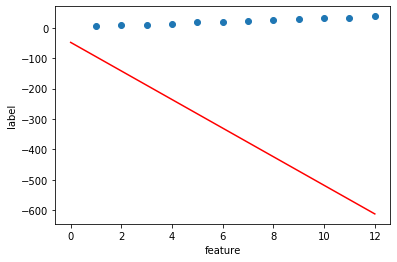

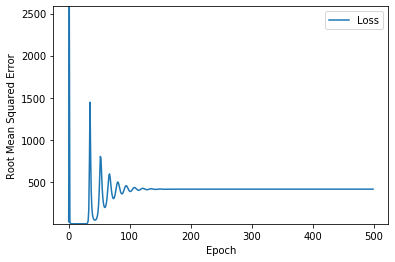

In [11]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

In [12]:
# Set the learning rate and number of epochs
learning_rate= ?  # Replace ? with a floating-point number
epochs= ?   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

SyntaxError: invalid syntax (<ipython-input-12-501744457bc7>, line 2)

Train on 12 samples
Epoch 1/70
12/12 [==============================] - 0s 19ms/sample - loss: 362.0728 - root_mean_squared_error: 19.0282
Epoch 2/70
12/12 [==============================] - 0s 1000us/sample - loss: 236.4975 - root_mean_squared_error: 15.3785
Epoch 3/70
12/12 [==============================] - 0s 1ms/sample - loss: 169.3690 - root_mean_squared_error: 13.0142
Epoch 4/70
12/12 [==============================] - 0s 1ms/sample - loss: 125.2372 - root_mean_squared_error: 11.1909
Epoch 5/70
12/12 [==============================] - 0s 1ms/sample - loss: 93.8685 - root_mean_squared_error: 9.6886
Epoch 6/70
12/12 [==============================] - 0s 1ms/sample - loss: 70.7043 - root_mean_squared_error: 8.4086
Epoch 7/70
12/12 [==============================] - 0s 1ms/sample - loss: 53.2542 - root_mean_squared_error: 7.2975
Epoch 8/70
12/12 [==============================] - 0s 1ms/sample - loss: 39.9807 - root_mean_squared_error: 6.3230
Epoch 9/70
12/12 [======================

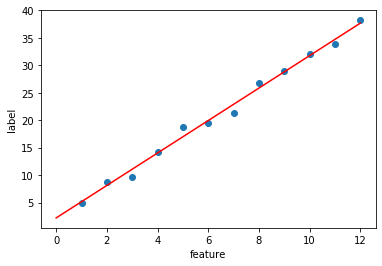

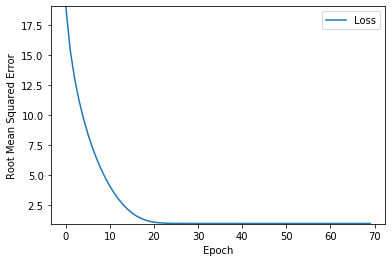

In [13]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 0s 29ms/sample - loss: 965.0159 - root_mean_squared_error: 31.0647
Epoch 2/100
12/12 [==============================] - 0s 835us/sample - loss: 885.6740 - root_mean_squared_error: 29.7603
Epoch 3/100
12/12 [==============================] - 0s 1ms/sample - loss: 831.3702 - root_mean_squared_error: 28.8335
Epoch 4/100
12/12 [==============================] - 0s 1ms/sample - loss: 787.7844 - root_mean_squared_error: 28.0675
Epoch 5/100
12/12 [==============================] - 0s 2ms/sample - loss: 750.4509 - root_mean_squared_error: 27.3944
Epoch 6/100
12/12 [==============================] - 0s 1ms/sample - loss: 717.3159 - root_mean_squared_error: 26.7828
Epoch 7/100
12/12 [==============================] - 0s 1ms/sample - loss: 687.2422 - root_mean_squared_error: 26.2153
Epoch 8/100
12/12 [==============================] - 0s 1ms/sample - loss: 659.5257 - root_mean_squared_error: 25.6812
Epoch 9/100
12/12 [======

Epoch 70/100
12/12 [==============================] - 0s 1ms/sample - loss: 20.4826 - root_mean_squared_error: 4.5258
Epoch 71/100
12/12 [==============================] - 0s 1ms/sample - loss: 18.4222 - root_mean_squared_error: 4.2921
Epoch 72/100
12/12 [==============================] - 0s 807us/sample - loss: 16.5192 - root_mean_squared_error: 4.0644
Epoch 73/100
12/12 [==============================] - 0s 1ms/sample - loss: 14.7679 - root_mean_squared_error: 3.8429
Epoch 74/100
12/12 [==============================] - 0s 1ms/sample - loss: 13.1623 - root_mean_squared_error: 3.6280
Epoch 75/100
12/12 [==============================] - 0s 1ms/sample - loss: 11.6964 - root_mean_squared_error: 3.4200
Epoch 76/100
12/12 [==============================] - 0s 1ms/sample - loss: 10.3639 - root_mean_squared_error: 3.2193
Epoch 77/100
12/12 [==============================] - 0s 1ms/sample - loss: 9.1583 - root_mean_squared_error: 3.0263
Epoch 78/100
12/12 [==============================] - 0

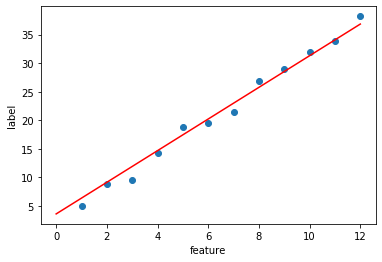

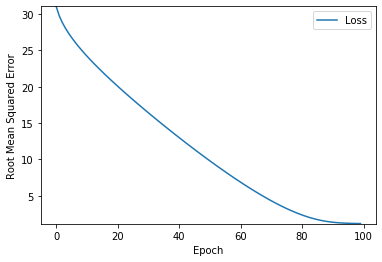

In [14]:
learning_rate=0.05
epochs=100
my_batch_size=12  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/125
12/12 [==============================] - 0s 19ms/sample - loss: 436.9035 - root_mean_squared_error: 20.9022
Epoch 2/125
12/12 [==============================] - 0s 869us/sample - loss: 384.0909 - root_mean_squared_error: 19.5982
Epoch 3/125
12/12 [==============================] - 0s 1ms/sample - loss: 349.0091 - root_mean_squared_error: 18.6818
Epoch 4/125
12/12 [==============================] - 0s 1ms/sample - loss: 321.4763 - root_mean_squared_error: 17.9298
Epoch 5/125
12/12 [==============================] - 0s 1ms/sample - loss: 298.3495 - root_mean_squared_error: 17.2728
Epoch 6/125
12/12 [==============================] - 0s 1ms/sample - loss: 278.1905 - root_mean_squared_error: 16.6790
Epoch 7/125
12/12 [==============================] - 0s 1ms/sample - loss: 260.2049 - root_mean_squared_error: 16.1309
Epoch 8/125
12/12 [==============================] - 0s 1ms/sample - loss: 243.9022 - root_mean_squared_error: 15.6174
Epoch 9/125
12/12 [======

Epoch 70/125
12/12 [==============================] - 0s 972us/sample - loss: 0.9188 - root_mean_squared_error: 0.9585
Epoch 71/125
12/12 [==============================] - 0s 1ms/sample - loss: 0.9108 - root_mean_squared_error: 0.9543
Epoch 72/125
12/12 [==============================] - 0s 1ms/sample - loss: 0.9054 - root_mean_squared_error: 0.9515
Epoch 73/125
12/12 [==============================] - 0s 946us/sample - loss: 0.9020 - root_mean_squared_error: 0.9497
Epoch 74/125
12/12 [==============================] - 0s 1ms/sample - loss: 0.8997 - root_mean_squared_error: 0.9485
Epoch 75/125
12/12 [==============================] - 0s 939us/sample - loss: 0.8983 - root_mean_squared_error: 0.9478
Epoch 76/125
12/12 [==============================] - 0s 931us/sample - loss: 0.8973 - root_mean_squared_error: 0.9473
Epoch 77/125
12/12 [==============================] - 0s 901us/sample - loss: 0.8966 - root_mean_squared_error: 0.9469
Epoch 78/125
12/12 [==============================] - 

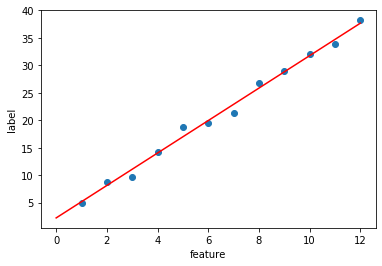

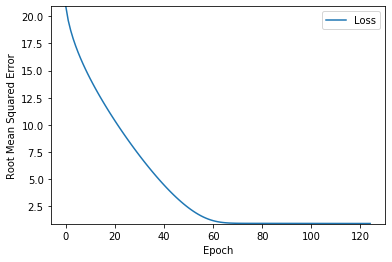

In [15]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the training loss too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.